<a href="https://colab.research.google.com/github/JaeyeongLee1/DSAIL_summer_internship/blob/main/Graph_embedding(DeepWalk)_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

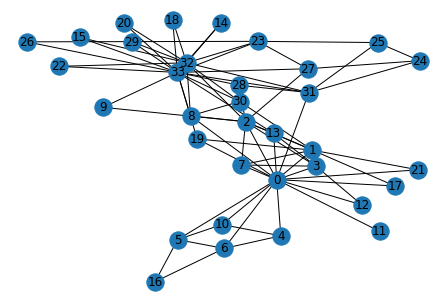

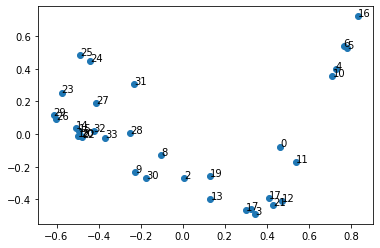

In [55]:
import networkx as nx
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random

G = nx.karate_club_graph() #https://networkx.org/documentation/stable/auto_examples/graph/plot_karate_club.html
nx.draw(G, with_labels=True)
plt.show()

def RandomWalk(G,v,t):
  if t==0:
    return []
  else:
    v_neighbor = random.choice(list(G.neighbors(v)))
    return [str(v)] + RandomWalk(G,v_neighbor,t-1)

def DeepWalk(G,w,d,r,t):
  sentences=[]
  V = list(G)
  for i in range(r):
    random.shuffle(V)
    for v in V:
      W = RandomWalk(G,v,t)
      sentences.append(W)
  model = Word2Vec(sentences,size = d,min_count = 1,iter = 100,sg=1,window = w,workers=5)
  word_vectors = model.wv
  word_vectors_list = [word_vectors[v] for v in word_vectors.vocab.keys()]
  pca = PCA(n_components=2)
  xys = pca.fit_transform(word_vectors_list)
  xs = xys[:,0]
  ys = xys[:,1]

  plt.scatter(xs,ys)
  for i, v in enumerate(word_vectors.vocab):
    plt.annotate(v, xy=(xs[i], ys[i]))
  return model

DeepWalk(G,7,300,100,100)



In [46]:
RandomWalk(G,1,7)

['1', '21', '0', '4', '10', '0', '7']